In [13]:
# specific version of DDG to avoid rate limiting
%pip install -Uqq fastai duckduckgo_search==5.3.1b1

Note: you may need to restart the kernel to use updated packages.


In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

In [3]:
def search_images(term,max_images=30):
    print(f'Searching for "{term}"')
    return L(DDGS().images(term,max_results=max_images)).itemgot('image')

In [4]:
urls = search_images('anime traps',max_images=1)

Searching for "anime traps"


In [5]:
def remove_gif_files(directory):
    for file_path in directory.glob('*.gif'):
        file_path.unlink()

In [6]:
searches = 'girl','trap'
path = Path('trap_or_not')
from time import sleep
from fastai.data.external import *
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents = True)
    download_images(dest,urls=search_images(f'top 20 anime {o}'))
    sleep(10)
    download_images(dest,urls=search_images(f'anime {o}'))
    sleep(10)
    download_images(dest,urls=search_images(f'underrated anime {o}'))
    sleep(10)
    remove_gif_files(dest)
    resize_images(dest ,max_size=400 , dest=dest)

Searching for "top 20 anime girl"
Searching for "anime girl"
Searching for "underrated anime girl"
Searching for "top 20 anime trap"
Searching for "anime trap"
Searching for "underrated anime trap"


In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

26

In [8]:
failed

(#26) [Path('trap_or_not/girl/1dd66086-a0cc-4ca2-8a22-89812df1f5fe.jpg'),Path('trap_or_not/girl/2d02ef87-1c03-488f-a622-a9038e91d4d2.jpg'),Path('trap_or_not/girl/3b601769-ebdf-4d6b-a04c-3df258692849.jpg'),Path('trap_or_not/girl/3b978bc5-2e92-40ff-9793-24b2deb48d9b.jpg'),Path('trap_or_not/girl/3bf1bc47-1de9-41e7-9c25-6ee1c833235f.jpg'),Path('trap_or_not/girl/404350bb-c0f4-41b4-b79e-553bb522bba0.jpg'),Path('trap_or_not/girl/4471bfd7-3fc0-4b39-9213-5a2ebee8b6b5.jpg'),Path('trap_or_not/girl/5df2fe31-2e1b-4c0d-b59b-35a3cc9d5a10.jpg'),Path('trap_or_not/girl/62f8e282-a18a-4fc6-beb4-a1baa0ee8382.jpeg'),Path('trap_or_not/girl/6adddf17-2860-4a7d-b2b7-0c385cc433ac.jpg')...]

In [9]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(192, method='squish')
).dataloaders(path, bs=32)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\avira/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 19.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.163670,1.697284,0.553571,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.555216,0.987792,0.464286,00:07
1,0.424477,0.394400,0.214286,00:08
2,0.326671,0.264682,0.125000,00:07


Searching for "Luka Urushibara"


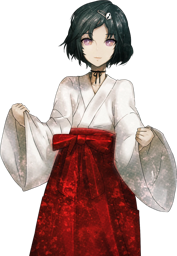

In [19]:
trap = search_images('Luka Urushibara',max_images=1)
dest = 'test.jpg'
download_url(trap[0],dest,show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

In [22]:
is_trap,_,probs = learn.predict(PILImage.create('test.jpg'))
print(f'This is most likely: {is_trap}')
print(f'Probability: {probs[1]:.2f}')

This is most likely: girl
Probability: 0.24


Searching for "tomo aizawa"


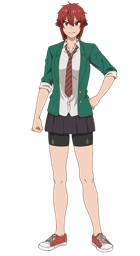

In [24]:
trap = search_images('tomo aizawa',max_images=1)
dest = 'test2.jpg'
download_url(trap[0],dest,show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

In [26]:
is_girl,_,probs = learn.predict(PILImage.create('test2.jpg'))
print(f'This is most likely: {is_girl}')
print(f'Probability: {probs[1]:.2f}')

This is most likely: trap
Probability: 0.98


# Conclusion
- the first prediction is quite hard to predict even by the human eye because the illustrations are quite decieving hence it doesnt come off as a surprise that the model predicts it incorrectly
- the second answer in theory is correct but counts as a reverse-trap but a category for it was not made as my sole purpose was to get more acquainted with fast.ai but the procedure would essentially just include adding the string 'reverse-trap' to searches list
- there is most likely an overfit as well most likely due to the same characters being present in both train and val